**Data Science aplicado à manutenção preditiva: bombas d’água na Tanzânia**

In [0]:
# Instalando o Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse

# !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
# !add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
# !apt-get update -qq 2>&1 > /dev/null
# !apt-get -y install -qq google-drive-ocamlfuse fuse

In [0]:
# Generate auth tokens for Colab

# from google.colab import auth
# auth.authenticate_user()

In [0]:
# Generate creds for the Drive FUSE library.

# from oauth2client.client import GoogleCredentials
# creds = GoogleCredentials.get_application_default()
# import getpass
# !google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
# vcode = getpass.getpass()
# !echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [0]:
# Create a directory and mount Google Drive using that directory.

# !mkdir -p drive
# !google-drive-ocamlfuse drive

In [9]:
print ("Files in my drive:")
!ls drive/

Files in my drive:
Colab Notebooks    Europass  submissions_27_02.csv
Digit_recognition  Fotos     tut_kaggle
Engenharia	   pump_it   Tutorial_Kaggle.ipynb


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
data = pd.read_csv('drive/pump_it/train.csv')
target = pd.read_csv('drive/pump_it/train_label.csv')

In [12]:
data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [13]:
target.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [14]:
print('data:',data.shape)
print('target:',target.shape)

data: (59400, 40)
target: (59400, 2)


Text(0.5,1,'Status(%)')

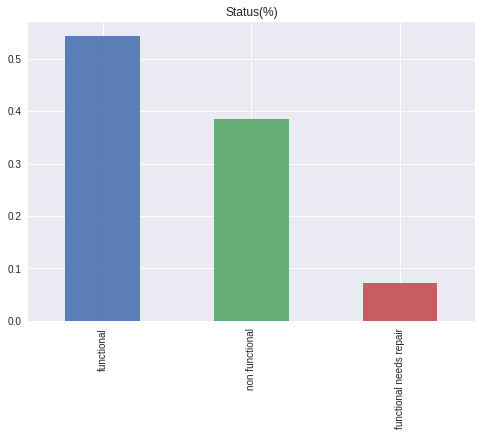

In [15]:
target.status_group.value_counts(normalize=True).plot(kind="bar",alpha=0.9)
plt.title("Status(%)")

In [16]:
data.payment_type.value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

Text(0.5,1,'Forma de pagamento')

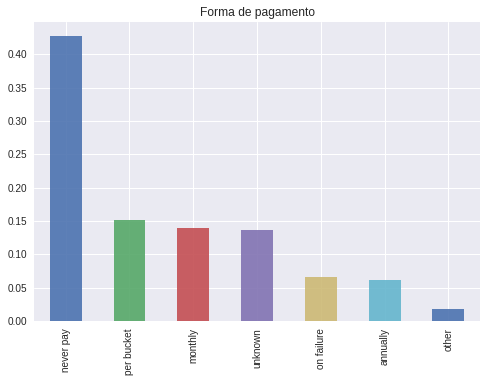

In [17]:
data.payment_type.value_counts(normalize=True).plot(kind="bar",alpha=0.9)
plt.title("Forma de pagamento")

In [0]:
# Concatenar data e target(para o gráfico)
df = pd.concat([data,target.status_group], axis=1)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


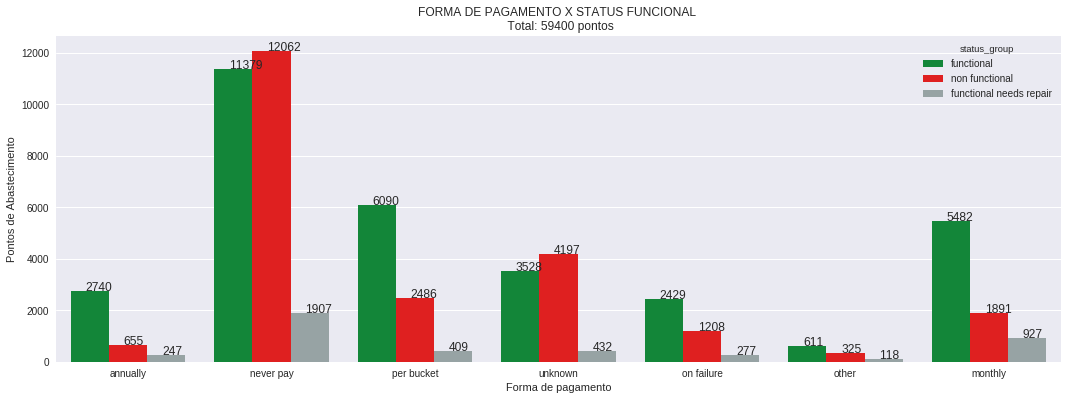

In [19]:
cores = ["#009933", "#ff0000", "#95a5a6"]
fig = plt.figure(figsize=(18,6))
dados = sns.countplot(data=df, x='payment_type', hue='status_group', palette=cores)

# Posicionando valores acima das barras
for p in dados.patches:
    b=p.get_bbox()
    dados.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

plt.title('FORMA DE PAGAMENTO X STATUS FUNCIONAL \n Total: %s pontos' % (df.shape[0]))
plt.xlabel('Forma de pagamento')
plt.ylabel('Pontos de Abastecimento')
plt.show()

In [20]:
df.quantity.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


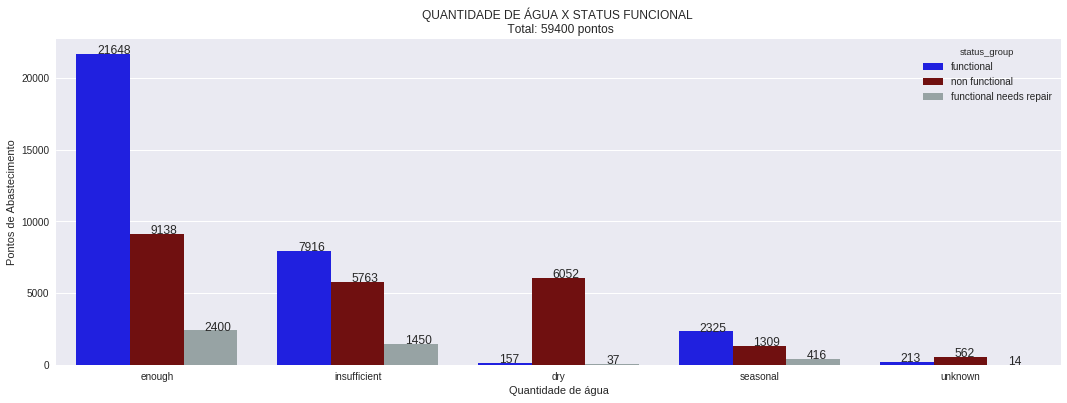

In [21]:
cores = ["#0000ff", "#800000", "#95a5a6"]
fig = plt.figure(figsize=(18,6))
dados = sns.countplot(data=df, x='quantity', hue='status_group', palette=cores)

# Posicionando valores acima das barras
for p in dados.patches:
    b=p.get_bbox()
    dados.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

plt.title('QUANTIDADE DE ÁGUA X STATUS FUNCIONAL \n Total: %s pontos' % (df.shape[0]))
plt.xlabel('Quantidade de água')
plt.ylabel('Pontos de Abastecimento')
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [0]:
# Pontos que aparentemente não são importantes:
# wpt_name - Nome do ponto de abastecimento, se houver um nome - Não deve ser importante para o status do ponto de abast.
# recorded_by - Na feature recorded_by todos os valores são "GeoData Consultants Ltd". 
data.drop('wpt_name', axis=1, inplace=True)
data.drop('recorded_by', axis=1, inplace=True)

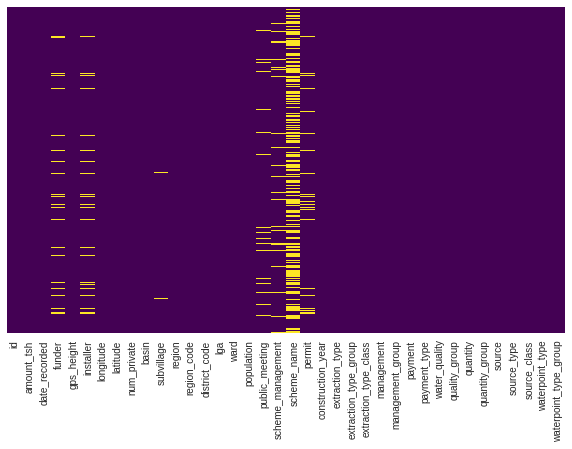

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),cbar=False, yticklabels=False, cmap='viridis')
plt.show()

In [0]:
# Preencher os valores ausentes
for col in ['funder','installer','subvillage','public_meeting','scheme_management','scheme_name','permit']:
    data[col].fillna('SI', inplace=True) # SI = sem informações

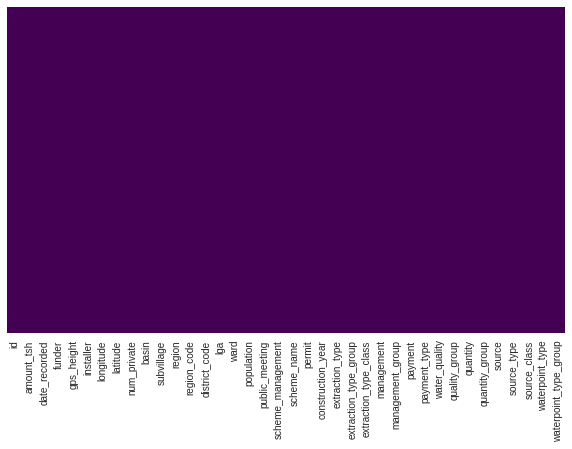

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),cbar=False, yticklabels=False, cmap='viridis')
plt.show()

In [27]:
# Verificar features que possuem muitas 'categorias unitárias'.
for col in list(data):
    if data[col].dtype == 'O':
        print(col,':',len(data[col].unique()))

date_recorded : 356
funder : 1898
installer : 2145
basin : 9
subvillage : 19288
region : 21
lga : 125
ward : 2092
public_meeting : 3
scheme_management : 13
scheme_name : 2697
permit : 3
extraction_type : 18
extraction_type_group : 13
extraction_type_class : 7
management : 12
management_group : 5
payment : 7
payment_type : 7
water_quality : 8
quality_group : 6
quantity : 5
quantity_group : 5
source : 10
source_type : 7
source_class : 3
waterpoint_type : 7
waterpoint_type_group : 6


In [0]:
# Agrupar os casos raros:
for col in ['funder', 'installer', 'subvillage','ward','scheme_name']:
    val = data[col].value_counts(normalize=False, sort=True, ascending=False)
    val_raros = [k for k in val.keys() if val[k]<50]
    if len(val_raros)>0:
        data.loc[data[col].isin(val_raros),col] = col+'_raros'

In [29]:
data.date_recorded.head()

0    2011-03-14
1    2013-03-06
2    2013-02-25
3    2013-01-28
4    2011-07-13
Name: date_recorded, dtype: object

In [30]:
data.construction_year.head()

0    1999
1    2010
2    2009
3    1986
4       0
Name: construction_year, dtype: int64

In [0]:
#Atualizando a coluna "date_recorded" até a data de referência "2018-01-01". Valor em meses.
import datetime
d1= pd.to_datetime(data['date_recorded'])
d2 = pd.to_datetime('2018-01-01')
dias = abs(d2 - d1).dt.days
meses = dias/30
data['date_recorded'] = meses

In [32]:
data['date_recorded'].head()

0    82.833333
1    58.733333
2    59.033333
3    59.966667
4    78.800000
Name: date_recorded, dtype: float64

In [33]:
# Verificando a média dos anos
data['construction_year'].mean()

1300.6524747474748

In [34]:
# Calcular a média dos valores não-nulos
soma = 0
cont = 0
for i in data['construction_year']:
    if i != 0:
        soma = soma+i
        cont = cont+1
media = round(soma/cont)
media

1997

In [0]:
# Substituindo os valores nulos pela média
data.loc[data['construction_year'] == 0,'construction_year'] = media

In [0]:
# Agora que 'construction_year' está completa, vou "contar os anos" em referência à 2018.
data['construction_year'] = 2018 - data['construction_year']

In [37]:
data['construction_year'].head()

0    19
1     8
2     9
3    32
4    21
Name: construction_year, dtype: int64

In [0]:
for col in ['funder','installer','subvillage','lga','ward','scheme_name']:
    # Converter a coluna para 'category'
    data[col] = data[col].astype('category')
    # Criar uma nova coluna codificada
    data[col+'_new']=data[col].cat.codes
    # Eliminar a coluna original
    data.drop(col, axis=1, inplace=True)

In [0]:
for col in ['basin','region','public_meeting','scheme_management','permit','extraction_type','extraction_type_group','extraction_type_class','management','management_group','payment','payment_type','water_quality','quality_group','quantity','quantity_group','source','source_type','source_class','waterpoint_type','waterpoint_type_group']:
    nova_col = pd.get_dummies(data[col])
    data = pd.concat([data,nova_col],axis=1)
    data.drop(col, axis=1,inplace=True)
    
# data = pd.get_dummies(data, columns=['basin','region','public_meeting','scheme_management','permit','extraction_type','extraction_type_group','extraction_type_class','management','management_group','payment','payment_type','water_quality','quality_group','quantity','quantity_group','source','source_type','source_class','waterpoint_type','waterpoint_type_group'], drop_first=True)
        

In [0]:
data['gps_height'] = abs(data['gps_height'])

In [0]:
# Codificar o 'target'
 # Converter a coluna para 'category'
target['status_group'] = target['status_group'].astype('category')
# Criar uma nova coluna codificada
target['status_group_new']=target['status_group'].cat.codes

In [42]:
target.head()

,id,status_group,status_group_new
0,69572,functional,0
1,8776,functional,0
2,34310,functional,0
3,67743,non functional,2
4,19728,functional,0


**Criando o classificador**

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier

In [0]:
# Vamos reservar 20% dos dados para testes
all_X = data
all_y = target.status_group_new
train_X, test_X, train_y, test_y = train_test_split(all_X, all_y, test_size=0.20,random_state=0)

**Regressão Logística multinomial**

In [0]:
rl = LogisticRegression(random_state=0, multi_class='ovr')

In [174]:
rl.fit(train_X, train_y)
predictions = rl.predict(test_X)
accuracy = accuracy_score(test_y, predictions)
print(accuracy)

0.7201178451178452


In [178]:
# Validação cruzada
scores = cross_val_score(rl, all_X, all_y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.70808081 0.71173598 0.71202425 0.71587275 0.71611382 0.72041744
 0.72142737 0.72323232 0.73068507 0.73804714]
0.719763695213497


**Random Forest**

In [0]:
rf = RandomForestClassifier(n_estimators=20)

In [171]:
rf.fit(train_X, train_y)
predictions = rf.predict(test_X)
accuracy = accuracy_score(test_y, predictions)
print(accuracy)

0.8032828282828283


In [172]:
# Validação cruzada
scores = cross_val_score(rf, all_X, all_y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.79558848 0.79835045 0.80050505 0.80316552 0.80330077 0.80373674
 0.80454545 0.81097458 0.8126578  0.81329966]
0.8046124517840489


In [0]:
# SVM
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(train_X, train_y)
predictions = svm_model_linear.predict(test_X)
accuracy = accuracy_score(test_y, predictions)
print(accuracy)